In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df = df.filter(['mpg', 'wt'])

In [4]:
df.head()

,mpg,wt
0,21.0,2.620
1,21.0,2.875
2,22.8,2.320
3,21.4,3.215
4,18.7,3.440


In [5]:
y = df['mpg']
x = df['wt']

In [6]:
x.shape

(32,)

#### Q1

In [7]:
def myFnLinReg(x,y):
    costs = []
    m = len(y)
    alpha = 0.1
    epoch = 1000
    w = 0
    b = 0

    for _ in range(epoch):
        h0 = np.dot(x, w) + b
        cost = np.mean((y-h0)**2)
        
        dw = (1/m)*np.dot(x.T, (h0 - y))
        db = (1/m)*np.sum((h0 - y))
        
        w = w - alpha * dw
        b = b - alpha * db        
        
        costs.append(cost)
        
    return costs, w, b, cost

#### Q2

In [8]:
x_train = x[:25]
y_train = y[:25]
x_test = x[25:]
y_test = y[25:]

In [9]:
costs, w, b, c = myFnLinReg(x_train, y_train)

In [10]:
w

-5.3301386451515445

In [11]:
b

37.6274002459753

In [12]:
def predict(x, w, b):
    h0 = np.dot(x, w) + b
    return h0

In [13]:
h_ = predict(x_test, w, b)
h_

array([27.31358197, 26.22090355, 29.56290048, 20.73086074, 22.8629162 ,
       18.59880528, 22.80961481])

In [14]:
y_test

25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

Text(0, 0.5, 'mpg')

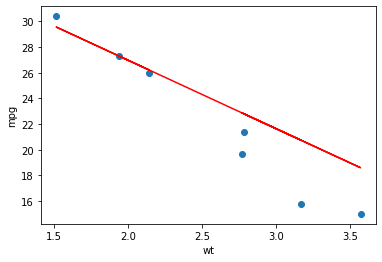

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_test, h_, c = 'red')
plt.xlabel('wt')
plt.ylabel('mpg')

Text(0, 0.5, 'Cost')

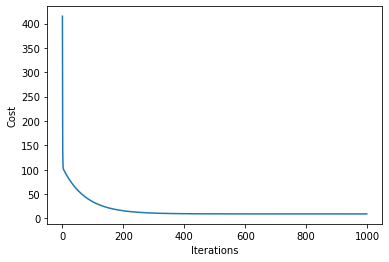

In [16]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')

#### Q3

In [17]:
d = predict(5.5, w, b)
d

8.311637697641807

#### Q4

In [18]:
def RMSE(y_test, h_):
    m = len(y_test)
    rm = sum(h_ - y_test)**2 / m
    se = np.sqrt(rm)
    return se

In [19]:
RMSE(y_test, h_)

4.7243983104286

In [20]:
def R2(y, y_pred):
    error = y - y_pred
    se = np.sum(error**2)
    SSt = np.sum((y - np.mean(y))**2)
    R2 = 1- (se/SSt)
    return R2

In [21]:
R2(y_test, h_)

0.7588632640876551

#### Q5

#### MGD

In [22]:
class mini_batch_gradient_descent:
    
    def create_batch(self,x_train,y_train,batch_size):
        mini_batches=[]
        data=np.stack((x_train,y_train),axis=1)
        np.random.shuffle(data)
        no_of_batches=x_train.shape[0]//batch_size
        for i in range(no_of_batches):
            mini_batch=data[i*batch_size:(i+1)*batch_size]
            mini_batches.append((mini_batch[:,0],mini_batch[:,1]))
        if x_train.shape[0]%batch_size!=0:
            mini_batch=data[(i+1)*batch_size:]
            mini_batches.append((mini_batch[:,0],mini_batch[:,1]))
        return mini_batches
    
    def fit(self,x_train,y_train,alpha,epochs,batch_size):
        self.m=np.random.randn(1,1)
        self.c=np.random.randn(1,1)
        l=len(x_train)
        for i in range(epochs):
            batches=self.create_batch(x_train,y_train,batch_size)
            for batch in batches:
                xb=batch[0]
                yb=batch[1]
                xb=xb.reshape(1,xb.shape[0])
                intecept=np.sum((np.dot(self.m,xb)+self.c)-yb)
                slope=np.sum(((np.dot(self.m,xb)+self.c)-yb)*xb)
                self.m=self.m-alpha*(slope/l)
                self.c=self.c-alpha*(intecept/l)
    
    def slope_intercept(self):
        print(f"slope: {self.m[0][0]}")
        print(f"intecept: {self.c[0][0]}")
    
    def predict(self,x_test):
        x_test=x_test.values.reshape(x_test.shape[0],1)
        self.m=self.m.reshape(self.m.shape[1],self.m.shape[0])
        result=np.dot(x_test,self.m)+self.c
        return result

In [23]:
mgd=mini_batch_gradient_descent()

In [24]:
mgd.fit(x_train,y_train,0.01,4000,4)

In [25]:
mgd.slope_intercept()

slope: -4.668233466159432
intecept: 35.21542448062483


In [26]:
y_pred=mgd.predict(x_test)

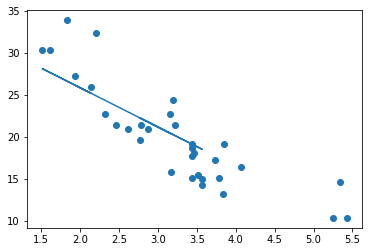

In [27]:
plt.plot(x_test, y_pred)
plt.scatter(x,y)

#### SGD

In [28]:
def SGD(X, y, lr=0.1, epoch=100, batch_size=1):
    m, b = 0.5, 0.5
    log, mse = [], []
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size)
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [29]:
m, b, log, mse = SGD(x_train, y_train, lr=0.01, epoch=100, batch_size=2)

In [30]:
def predict(x_test, m, b):
    y_pred = x_test * m + b
    return y_pred

In [31]:
y_pred = predict(x_test, m, b)